In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from pprint import pprint
from pandas.io.json import json_normalize
import gmaps

In [2]:
 # Emply list for articles
brewery_list = []

# loop through pages 0-161
for page in range(0, 161):
   url = "https://api.openbrewerydb.org/breweries?"
   # create query with page number
   query_url = f"{url}page={str(page)}&per_page=50"
   data = requests.get(query_url).json()

   # loop through the response and append each article to the list
   for brewery in data:
       brewery_list.append(brewery)
brewery_list

[{'id': 2,
  'name': 'Avondale Brewing Co',
  'brewery_type': 'micro',
  'street': '201 41st St S',
  'city': 'Birmingham',
  'state': 'Alabama',
  'postal_code': '35222-1932',
  'country': 'United States',
  'longitude': '-86.774322',
  'latitude': '33.524521',
  'phone': '2057775456',
  'website_url': 'http://www.avondalebrewing.com',
  'updated_at': '2018-08-23T23:19:57.825Z'},
 {'id': 4,
  'name': 'Band of Brothers Brewing Company',
  'brewery_type': 'micro',
  'street': '1605 23rd Ave',
  'city': 'Tuscaloosa',
  'state': 'Alabama',
  'postal_code': '35401-4653',
  'country': 'United States',
  'longitude': '-87.5621551272424',
  'latitude': '33.1984907123707',
  'phone': '2052665137',
  'website_url': 'http://www.bandofbrosbrewing.com',
  'updated_at': '2018-08-23T23:19:59.462Z'},
 {'id': 44,
  'name': 'Trim Tab Brewing',
  'brewery_type': 'micro',
  'street': '2721 5th Ave S',
  'city': 'Birmingham',
  'state': 'Alabama',
  'postal_code': '35233-3401',
  'country': 'United States

In [3]:
#put data into dataframe
df = pd.DataFrame(brewery_list)
df.head()

,brewery_type,city,country,id,latitude,longitude,name,phone,postal_code,state,street,updated_at,website_url
0,micro,Birmingham,United States,2,33.524521,-86.774322,Avondale Brewing Co,2057775456,35222-1932,Alabama,201 41st St S,2018-08-23T23:19:57.825Z,http://www.avondalebrewing.com
1,micro,Tuscaloosa,United States,4,33.1984907123707,-87.5621551272424,Band of Brothers Brewing Company,2052665137,35401-4653,Alabama,1605 23rd Ave,2018-08-23T23:19:59.462Z,http://www.bandofbrosbrewing.com
2,micro,Birmingham,United States,44,33.5128492349817,-86.7914000624146,Trim Tab Brewing,2057030536,35233-3401,Alabama,2721 5th Ave S,2018-08-23T23:20:31.423Z,http://www.trimtabbrewing.com
3,micro,Huntsville,United States,46,34.7277523,-86.5932014,Yellowhammer Brewery,2569755950,35805-3046,Alabama,2600 Clinton Ave W,2018-08-23T23:20:33.102Z,http://www.yellowhammerbrewery.com
4,micro,Wasilla,United States,55,61.5752695,-149.4127103,Bearpaw River Brewing Co,,99654-7679,Alaska,4605 E Palmer Wasilla Hwy,2018-08-23T23:20:40.743Z,http://bearpawriverbrewing.com


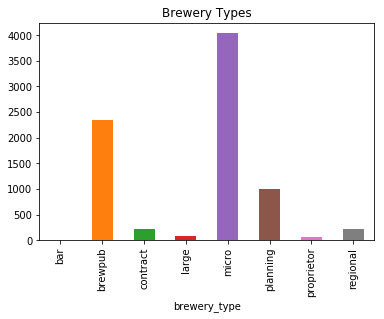

In [57]:
#group by brewery type and graph
brewery_type = df.groupby("brewery_type").count()
brewery_type = brewery_type['city']
x_axis = np.arange(len(brewery_type))
brewery_type.plot(kind = "bar", title = 'Brewery Types')
plt.savefig("Bewery_types.png")

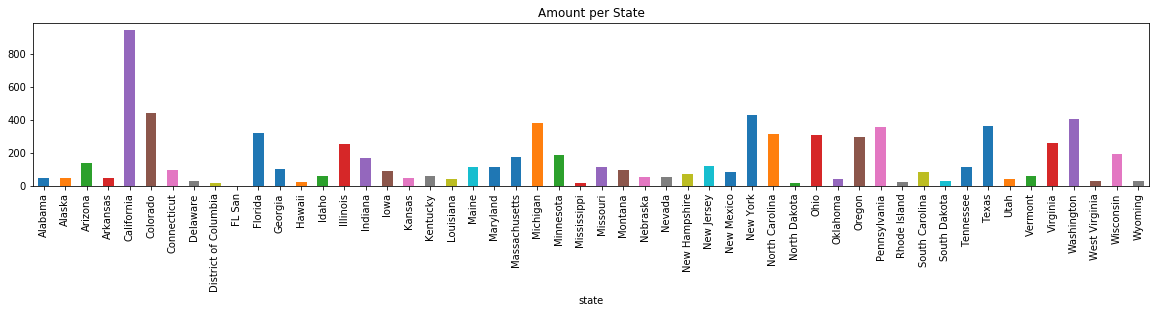

In [56]:
#group by state and graph
states = df.groupby("state").count()
states = states['city']
x_axis = np.arange(len(states))
states.plot(kind = "bar", title = "Amount per State", figsize=(20,3))
plt.savefig("Bewery_amount_per_state.png")

In [51]:
# find the states with the most breweries
top = states.sort_values(ascending=False)
top_states = top.head()
top_states

state
California    942
Colorado      439
New York      428
Washington    405
Michigan      381
Name: city, dtype: int64

In [52]:
# find the cities with the most breweries
city = df.groupby("city").count()
top_city = city['brewery_type'].sort_values(ascending=False)
top_city = top_city.head()
top_city

city
Portland     106
San Diego     94
Denver        93
Seattle       72
Chicago       65
Name: brewery_type, dtype: int64

In [8]:
#get breweries in Denver to map
local = df.loc[df['city'] == "Denver"]
local

,brewery_type,city,country,id,latitude,longitude,name,phone,postal_code,state,street,updated_at,website_url
154,micro,Denver,United States,1279,39.7825168,-105.002409475111,Burgundian Brewing Co.,4704400420,80211-2334,Colorado,4725 Lipan St,2018-08-24T00:22:21.710Z,http://www.facebook.com/BurgundianBrewing
155,micro,Denver,United States,1296,39.698793755102,-105.001629,Chain Reaction Brewing Company,3039220960,80223-2717,Colorado,902 S Lipan St,2018-08-24T00:22:31.364Z,http://www.chainreactionbrewingco.com
169,micro,Denver,United States,1516,39.7615104,-104.9812181,Ratio Beerworks,3102669264,80205-2309,Colorado,2920 Larimer St,2018-08-24T00:24:20.330Z,http://ratiobeerworks.com
173,brewpub,Denver,United States,1580,39.7764426,-105.0432655,The Grateful Gnome Sandwich Shoppe and Brewery,7205986863,80212-2335,Colorado,4369 Stuart St,2018-08-24T00:24:51.406Z,http://www.thegratefulgnome.com
174,contract,Denver,United States,1582,39.7677376780982,-104.909348665308,The Larimer Beer Company,7205076369,80207-1508,Colorado,3620 Newport St,2018-08-24T00:24:52.553Z,http://www.thelarimer.com
1794,micro,Denver,United States,1204,None,None,Alpine Dog Brewing Co,3038321245,80218-1405,Colorado,1505 N Ogden St,2018-08-11T21:36:30.661Z,http://www.alpinedogbrewery.com
1795,proprietor,Denver,United States,1207,None,None,Amalgam Brewing,,80221-2036,Colorado,6381 Beach St Unit A,2018-08-11T21:36:30.778Z,http://www.amalgambrewing.com
1810,large,Denver,United States,1191,39.7592508,-104.9853655,10 Barrel Brewing Co - Denver,7205738992,80205-2231,Colorado,2620 Walnut St,2018-08-24T00:05:11.372Z,
1813,proprietor,Denver,United States,1194,39.7614112,-104.9839636,14er Brewing Company,7207731437,80205-2235,Colorado,2801 Walnut St,2018-08-24T00:05:13.974Z,http://www.14erBrewing.com
1817,planning,Denver,United States,1203,39.7391428,-104.984696,Aero Craft Brewing,3039185446,80212-2199,Colorado,,2018-08-24T00:05:21.032Z,http://www.aerocraft.beer


In [53]:
# store geo locations
locations = local[["latitude", "longitude"]]

In [54]:
# drop 'none' values and convert string to float
cleanedList = locations.dropna()
cleanedList = cleanedList.astype(float)

In [47]:
# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

# Assign the marker layer to a variable
markers = gmaps.marker_layer(cleanedList)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…